<a href="https://colab.research.google.com/github/MLcmore2023/MLcmore2023/blob/main/day3_am_morning/logistic-regression-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
Logistic regression is a statistical model used for binary classification tasks. It predicts the probability of an event belonging to one of two classes. The model uses the sigmoid (logistic) function to transform the linear combination of features into a probability value between 0 and 1. The coefficients associated with each feature are learned during training, and predictions are made by applying these coefficients to new data. Logistic regression is widely used in various domains and offers interpretability, but assumes a linear relationship between features and the log-odds of the target variable.

### Import libraries and initialize random generator

In [1]:
import numpy as np
np.random.seed(0)

### Example 1: Linearly Separable Data
We will use the sklearn library to generate two clusters of random data.

Text(0.5, 1.0, 'Classification Dataset')

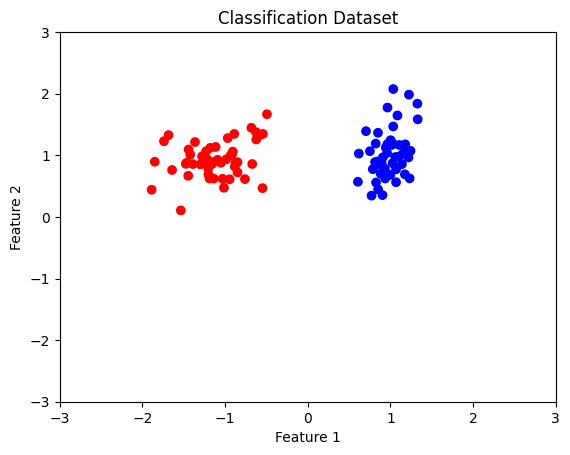

In [19]:
from sklearn.datasets import make_classification

# Generate the dataset
X, y = make_classification(n_features=2, n_redundant=0,
                           n_informative=2, random_state=1,
                           n_clusters_per_class=1)

# Plot the data points
import matplotlib.pyplot as plt
plt.xlim([-3, 3]); plt.ylim([-3, 3])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset')

## Logistics Regression Classifier

### sigmoid function
In binary classification, it is desirable for the hypothesis function ($\hat{y}$) to produce output values between 0 and 1. To achieve this, we can employ the sigmoid function, which effectively compresses the input values within the desired range.

<img src="https://raw.githubusercontent.com/MLcmore2023/MLcmore2023/main/.images/logistic_regression1.png" alt="Image Description" width="78%">

In [3]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

### Initializing weights and bias to zeros
In logistic regression, the prediction is $$\hat{y} = \sigma(w \cdot X + b)$$
where sigma is the sigmoid function, and w is the weights vector

In [4]:
def initialize_weights_and_biases(X):
    global num_of_training_examples, num_of_features
    num_of_training_examples, num_of_features = X.shape
    w = np.zeros((num_of_features,1))
    b = 0
    return w, b


The loss function is: $$
\text{Loss}(y, \hat{y}) = -\frac{1}{N}\sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i) \right)$$


In [5]:
#this code is optional, and only used for visualization or progress monitoring during training
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

### Calculating Gradient
dw is the partial derivative of the Loss function with respect to w and db is the partial derivative of the Loss function with respect to b

$$
\frac{\partial \text{Loss}}{\partial w_j} = \frac{1}{N}\sum_{i=1}^{N} (\hat{y}_i - y_i) x_{ij} $$

$$
\frac{\partial \text{Loss}}{\partial b} = \frac{1}{N}\sum_{i=1}^{N} (\hat{y}_i - y_i)
$$

In [6]:
def gradients(X, y, y_hat):
    # number of training examples.
    n = X.shape[0]

    # Gradient of loss with respect to weights.
    dw = (1/n)*np.dot(X.T, (y_hat - y))

    # Gradient of loss with respect to bias.
    db = (1/n)*np.sum((y_hat - y))

    return dw, db

### Gradient Descent
1. Initialize the weights and biases with zeros
2. Compute the gradient of the cost function in respect to the weights and biases for all training examples. (i.e. computing how we should change the weights and biases so that the network is less wrong in all training examples)
3. Now we know how we should change the weights and biases so that the network is less wrong, we use this gradient to update the weights and biases (minus the weights and biases by the gradients times a tiny number called learning rate)
4. Repeat for as many times as time and computation resource permits


In [7]:
def gradient_descent(X, y):
    w,b =initialize_weights_and_biases(X)

    # Standardize input
    X = (X - X.mean(axis=0))/X.std(axis=0)

    # Reshaping y to allow matrix multiplication
    y = y.reshape(num_of_training_examples,1)

    losses = [] #optional. This is just for visualization / monitoring
    num_of_epochs=1000
    learning_rate=0.01
    for epoch in range(num_of_epochs):

        # Calculating hypothesis/prediction.
        y_hat = sigmoid(np.dot(X, w) + b)

        # Getting the gradients of loss with respect to parameters.
        dw, db = gradients(X, y, y_hat)

        # Updating the parameters.
        w -= learning_rate*dw
        b -= learning_rate*db

        #optional. This is just for visualization / monitoring
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
    return w, b

### Prediction function
The way we defined hypothesis is the probability of y being 1 given X and parameterized by w and b. So, we will say that it will make a prediction of y=1 when y_hat ≥ 0.5, and  y=0 when y_hat < 0.5

In [8]:
def predict(X, w, b):
    # Normalizing the inputs.
    X = (X - X.mean(axis=0))/X.std(axis=0)

    # Calculating presictions/y_hat.
    predictions = sigmoid(np.dot(X, w) + b)

    y_pred = []
    # if y_hat >= 0.5 --> round up to 1.  if y_hat < 0.5 --> round up to 1
    for prediction in predictions:
        if prediction > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    return np.array(y_pred)

### Evaluation accuracy
We get an accuracy of 100%. We can see from the above decision boundary graph that we are able to separate the green and blue classes perfectly.

In [9]:
weights, biases = gradient_descent(X,y)
y_hat = predict(X, weights, biases)

total_elements = len(y.flatten())
correct_predictions = 0

for i in range(total_elements):
    if y.flatten()[i] == y_hat[i]:
        correct_predictions += 1

accuracy = correct_predictions / total_elements
print(accuracy)

1.0


### Visualize result

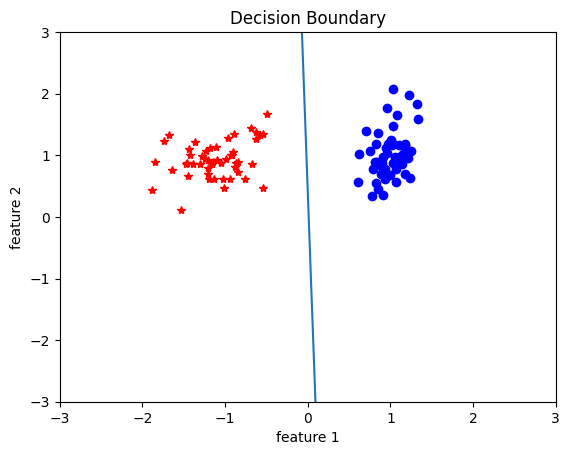

In [11]:
def plot_decision_boundary(X, y,w, b):
    #graph the boundary line
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    plt.plot(x1, x2, '-') # - means line style is straight line

    # Plot the points
    feature1 = X[:, 0]
    feature2 = X[:, 1]
    plt.xlim([-3, 3]); plt.ylim([-3, 3])
    plt.plot(feature1[y==0], feature2[y==0], "bo") # b means blue, o means round points
    plt.plot(feature1[y==1], feature2[y==1], "r*") # r means red, * means star points
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')

plot_decision_boundary(X, y_hat, weights, biases)

### Example 2: Non-linearly Separable Data

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.24)

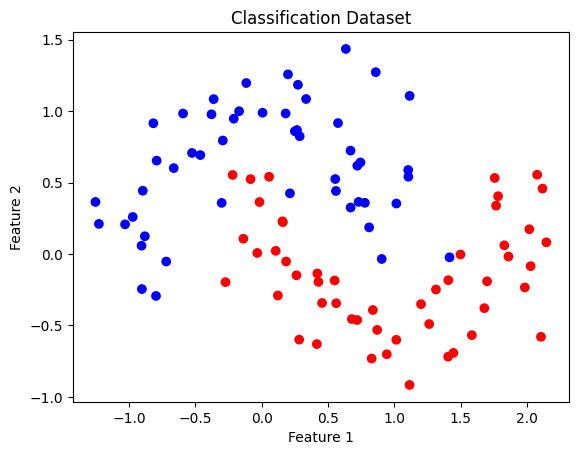

In [13]:
#visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset')
plt.show()

0.89


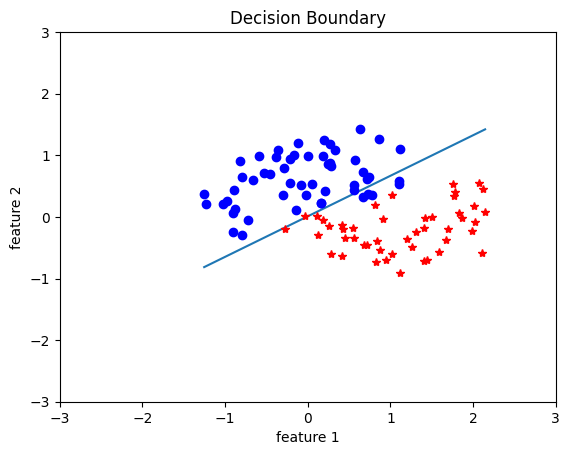

In [14]:
weights, biases = gradient_descent(X,y)
y_hat = predict(X, weights, biases)


total_elements = len(y.flatten())
correct_predictions = 0

for i in range(total_elements):
    if y.flatten()[i] == y_hat[i]:
        correct_predictions += 1

accuracy = correct_predictions / total_elements

print(accuracy)
plot_decision_boundary(X, y_hat, weights, biases)

## Exercise
1. Explain the main differences between logistic regression and linear regression. (their underlying assumption and the types of applicable problems)
2. apply logistic regression to the following dataset, to bank notes as real or fake.

The Banknote Authentication Dataset is a collection of data used for binary classification. It contains features extracted from images of genuine and counterfeit banknotes, captured using various sensors.

In [34]:
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/Dataweekends/zero_to_deep_learning_video/master/data/banknotes.csv")
display(dataset)

X = dataset.drop(columns=['class'])  # Replace 'target_column_name' with the actual target column name
y = dataset['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [36]:
#exercise question 2: code here


0.9018181818181819


### References
- https://statquest.org/video-index
- https://github.com/marvinlanhenke/DataScience/tree/main/MachineLearningFromScratch/LogisticRegression
- https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2